In [3]:
#import libs
import gensim

In [4]:
#load data
from src.data.load_data import load_trustpilot_data
from src.preprocessing.text_pre import clean_text
df_trust = load_trustpilot_data()
df_trust = clean_text(df_trust, 'text')

In [5]:
#tokenize text
def gensim_list(df):
    for index,row in df.iterrows():
        yield gensim.utils.simple_preprocess (row['text'])

documents = list (gensim_list (df_trust))

In [3]:
model = gensim.models.Word2Vec(
        documents,#the documents
        size=150, #The size of the dense vector to represent each token or word (the more data you higher)
        window=10, # The maximum distance between the target word and its neighboring word
        min_count=2, #Minimium frequency count of words
        workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

(85815057, 119392470)

In [4]:
model.save('data/models/word2vec.model')

In [3]:
word2vec_model = gensim.models.Word2Vec.load("data/models/word2vec.model")

In [6]:
w1 = 'nokia'
word2vec_model.wv.most_similar(positive=w1)

[('lumia', 0.811747670173645),
 ('htc', 0.7989593744277954),
 ('iphone', 0.7360115647315979),
 ('sony', 0.7152289748191833),
 ('huawei', 0.6917905211448669),
 ('mobiltelefon', 0.6752561926841736),
 ('bærbar', 0.6722087860107422),
 ('laptop', 0.6717250347137451),
 ('tablet', 0.671087920665741),
 ('lenovo', 0.6629709601402283)]

In [6]:
# viz word 2 vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
model_tsne = gensim.models.Word2Vec(
        documents,#the documents
        size=150, #The size of the dense vector to represent each token or word (the more data you higher)
        window=10, # The maximum distance between the target word and its neighboring word
        min_count=1000, #Minimium frequency count of words
        workers=10)
model_tsne.train(documents, total_examples=len(documents), epochs=10)

(67744032, 119386870)

In [11]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/niels/pyenv/pydata/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


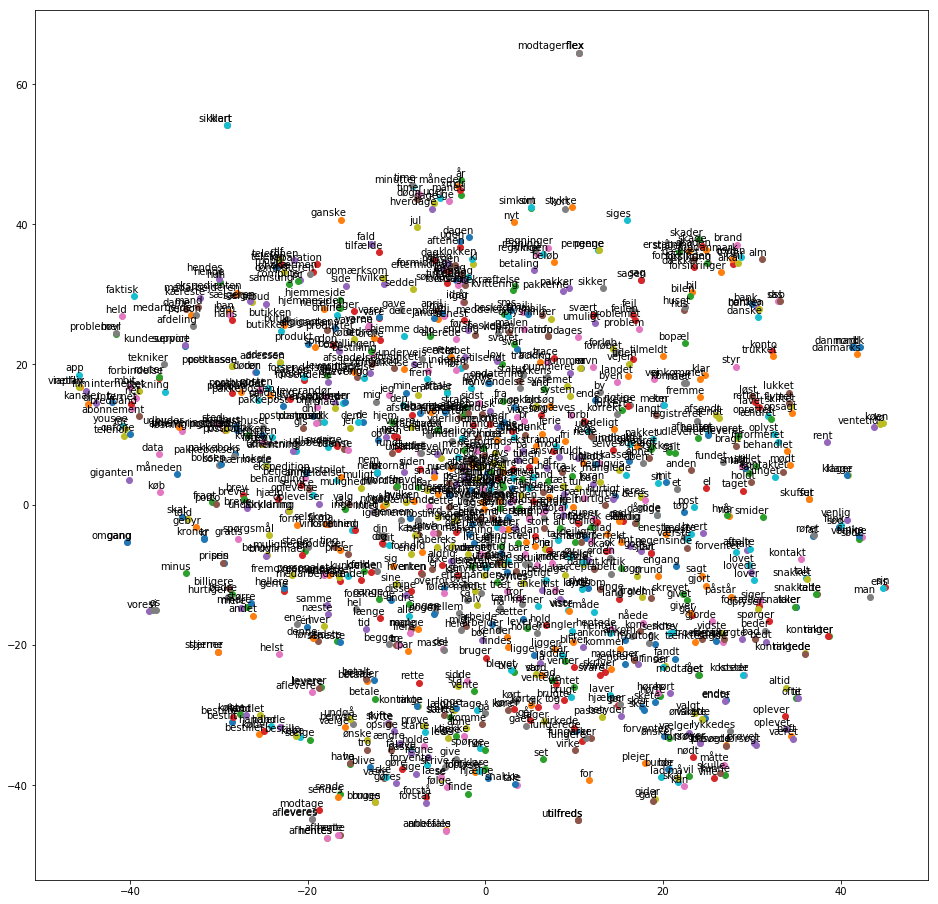

In [12]:
tsne_plot(model_tsne)